In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helper import get_poly_pred
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
df = pd.read_csv('poly.csv')
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


In [3]:
x = df[['x']].values
y = df['y'].values

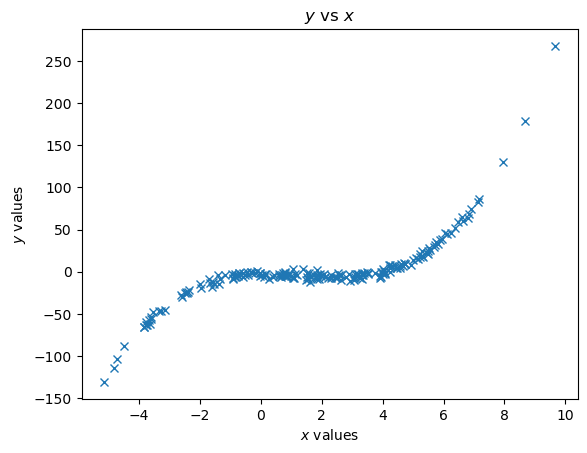

In [4]:
fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$')
plt.show();

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 22 )

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)
y_lin_pred = model.predict(x_test)

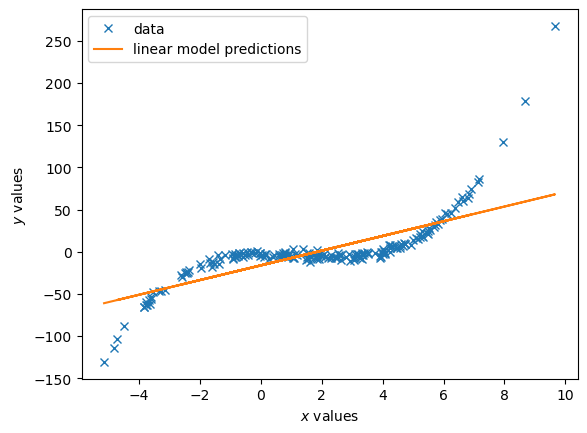

In [7]:
fig, ax = plt.subplots()
ax.plot(x,y,'x', label='data')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.plot(x_test, y_lin_pred, label='linear model predictions')
plt.legend();

In [8]:
guess_degree = 5

y_poly_pred = get_poly_pred(x_train, x_test, y_train, degree=guess_degree) 

(160, 1) (40, 1) (160,)


In [9]:
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

y_test = y_test[idx]

y_lin_pred = y_lin_pred[idx]

y_poly_pred= y_poly_pred[idx]

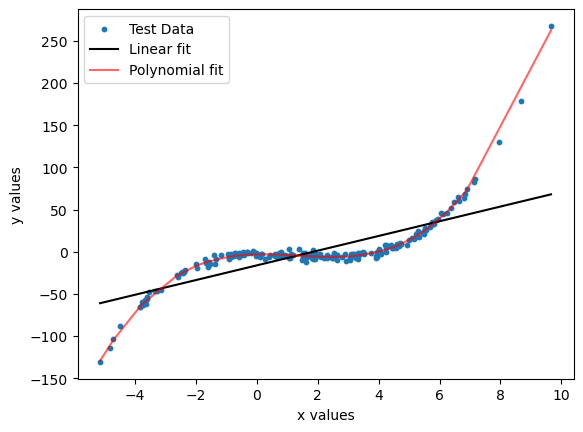

In [10]:
plt.scatter(x, y, s=10, label="Test Data")

plt.plot(x_test,y_lin_pred,label="Linear fit", color='k')

plt.plot(x_test, y_poly_pred, label="Polynomial fit",color='red', alpha=0.6)

plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [11]:
poly_residuals = y_test - y_poly_pred

In [12]:
lin_residuals = y_test - y_lin_pred

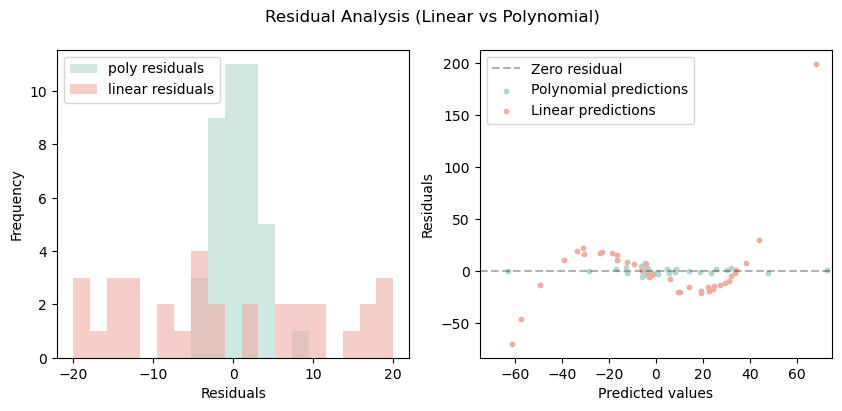

In [13]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

ax[0].hist(poly_residuals, bins, label = 'poly residuals', color='#B2D7D0', alpha=0.6)

ax[0].hist(lin_residuals, bins, label = 'linear residuals', color='#EFAEA4', alpha=0.6)

ax[0].legend(loc = 'upper left')

ax[1].hlines(0,-75,75, color='k', ls='--', alpha=0.3, label='Zero residual')
ax[1].scatter(y_poly_pred, poly_residuals, s=10, color='#B2D7D0', label='Polynomial predictions')
ax[1].scatter(y_lin_pred, lin_residuals, s = 10, color='#EFAEA4', label='Linear predictions' )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].legend(loc = 'upper left')
fig.suptitle('Residual Analysis (Linear vs Polynomial)')
plt.show();